# Numbriline diferentseerimine ja integreerimine

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 13.03.2018</div>
<div style="display:none">
$\renewcommand{\vec}{\boldsymbol}$
$\newcommand{\erf}{\mathop{\rm erf}\nolimits}$
$\newcommand{\cov}{\mathop{\rm cov}\nolimits}$
$\newcommand{\aver}[1]{\langle #1 \rangle}$
$\newcommand{\eps}{\varepsilon}$
$\newcommand{\expval}{\mathop{\rm E}\nolimits}$
$\newcommand{\dispers}{\mathop{\rm D}\nolimits}$
</div>

In [1]:
# üldised vahendid ja seadistused
import numpy as np
from numpy import pi, linspace, geomspace, arange, exp, sin, cos, log, sqrt, polyfit, polyval
from numpy.random import rand, randn
from matplotlib.pyplot import *
from matplotlib import rcParams
rcParams['figure.dpi'] = 100
rcParams['lines.markeredgewidth'] = 1
rcParams['lines.markersize'] = 4
rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'small'
rcParams['axes.prop_cycle'] = cycler('color', 'bgrmc')

def axtext(x, y, s, **kwargs):
    annotate(s, (x, y), xycoords='axes fraction',
             backgroundcolor='white', fontsize='small', **kwargs)

## Numbriline diferentseerimine

Numbrilisest diferentseerimisest ja integreerimisest võib rääkida kahes mõnevõrra erinevas tähenduses, sõltuvalt sellest kas on antud funktsioon ise või ainult tabelina selle väärtused mingites punktides.

Olgu funktsiooni $f(x)$ väärtused teada kahes punktis $x=a$ ja $x=a+h$. Tuletise definitsiooni baasil on ilmselt läbinähtav, et tuletise väärtust punktis $a$ võiks hinnata umbes sellist laadi [diferentssuhtega](https://en.wikipedia.org/wiki/Difference_quotient): $$f'(a)\approx \frac{f(a+h)-f(a)}{h}.$$ Üldisem lähenemine selliste *diferentsvalemite* tuletamiseks põhineb [Taylori teoreemil](https://en.wikipedia.org/wiki/Taylor%27s_theorem). Nimelt suvalist piisavalt diferentseeruvat funktsiooni $f(x)$ saab punkti $a$ ümbruses lähendada polünoomiga: $$f(x)=f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^2+ \ldots+\frac{f^{(k)}(a)}{k!}(x-a)^k+ \frac{f^{(k+1)}(\xi)}{(k+1)!}(x-a)^{k+1}.$$ Viimane liige on *jääkliige* ja selles sisalduv $\xi$ asub kusagil $a$ ja $x$ vahel. Jääkliige jääb sisse ka diferentsvalemisse, kus ta väljendab diferentsvalemi täpsust, kuid tuletise arvutamisel teda arvesse ei võeta.

Tuletame näitena diferentsvalemi 2. tuletise leidmiseks punktis $x=a$, kui on antud $f(a-h)$, $f(a)$ ja $f(a+h)$. Rakendame Taylori valemit (punktis $a$) nii $f(a+h)$ kui ka $f(a-h)$ arvutamiseks:
\begin{align*}
f(a+h) &= f(a)+f'(a)h+\frac{f''(a)}{2!}h^2+\frac{f'''(a)}{3!}h^3+\frac{f^{(4)}(\xi)}{4!}h^4\\
f(a-h) &= f(a)-f'(a)h+\frac{f''(a)}{2!}h^2-\frac{f'''(a)}{3!}h^3+\frac{f^{(4)}(\eta)}{4!}h^4
\end{align*}
Me kaasasime siin just parajasti nii kõrget järku liikmeid, et kui need võrrandid nüüd kokku liita, siis vabaneme kõigist mittevajalikest tuletistest (kuid järgi jäävad jääkliikmed, mida on tarvis diferentsvalemi täpsuse hindamiseks):
$$f(a+h)+f(a-h)=2f(a)+2\frac{f''(a)}{2!}h^2+\mathcal{O}(h^4),$$ millest $$f''(a)=\frac{f(a+h)-2f(a)+f(a-h)}{h^2}+\mathcal{O}(h^2).$$ Jääkliikme $\mathcal{O}(h^2)$ põhjal öeldakse, et valem on 2. järku täpsusega. Sõlmede valiku põhjal öeldakse, et tegemist on tsentreeritud ehk sümmeetrilise valemiga.

Analoogilisel viisil võib avaldada tuletise, võttes üks või mitu sammu ette või taha. Näiteks, kui me tahame sama täpsusega 2. tuletist, kasutades vaid samme ette, läheb tarvis funktsiooni väärtust juba neljas sõlmes: $$f''(a)=\frac{2f(a)-5f(a+h)+4f(a+2h)-f(a+3h)}{h^2}+\mathcal{O}(h^2).$$ Praktiliseks vajaduseks leiab sellise ühtlase sammuga diferentsvalemi koefitsiendid [tabelist](https://en.wikipedia.org/wiki/Finite_difference_coefficient).

NumPy massiivide indekseerimise teel on piisavalt madalat järku diferentsvalemeid küllaltki lihtne konstrueerida, nii et tuletise arvutamine sisemistes sõlmedes oleks endiselt vektoriseeritud operatsioon. Realiseerime näiteks 2. järku täpsusega tsentreeritud diferentsvalemi 1. tuletise arvutamiseks: $$f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2).$$

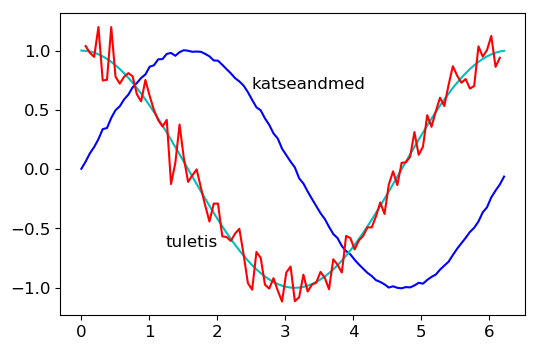

In [2]:
h = 0.02*pi
X = arange(0, 2*pi, h)
Y = sin(X) + 0.01*randn(len(X))

D = (Y[2:] - Y[:-2]) / (2*h)

figure(figsize=(6,4))
plot(X, Y, 'b-')
text(2.5, 0.65, 'katseandmed', ha='left', va='bottom')
plot(X, cos(X), 'c-')
plot(X[1:-1], D, 'r-')
text(2, -0.55, 'tuletis', ha='right', va='top')
show()

Vajadusel saaks tuletised otspunktides eraldi arvutada kasutades diferentsvalemeid sammuga ette või taha. Üldisemal kujul realiseerib selle algoritmi funktsioon `numpy.gradient`. Siin esimeseks, nõutud parameetriks on funktsiooni väärtuste massiiv. Teise parameetrina võib anda sammu $h$ või terve $x$-väärtuste massiivi. Viimasel juhul tohivad andmepunktid olla isegi ebaühtlase sammuga.

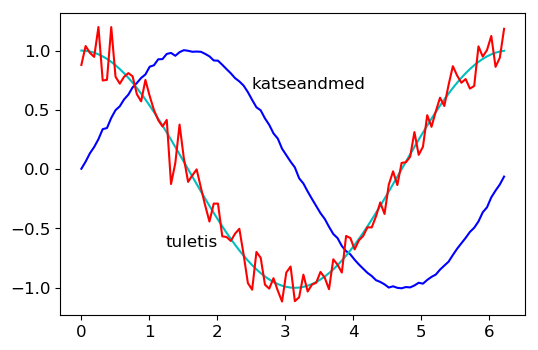

In [3]:
D = np.gradient(Y, h, edge_order=2)

figure(figsize=(6,4))
plot(X, Y, 'b-')
text(2.5, 0.65, 'katseandmed', ha='left', va='bottom')
plot(X, cos(X), 'c-')
plot(X, D, 'r-')
text(2, -0.55, 'tuletis', ha='right', va='top')
show()

Nagu näha, on numbriline diferentseerimine väga tundlik algandmete täpsuse suhtes ja vead võimenduvad tugevalt tuletise arvutamisel. Selle vastu aitab mingil määral andmete silumine (juhul kui andmepunktid paiknevad piisavalt tihedalt, võrreldes tuletise muutumise kiirusega).

Kui funktsioon on antud matemaatilise avaldisena, siis põhimõtteliselt saab välja arendada keerulisemaid algoritme, sest nüüd saab funktsiooni väärtust arvutada mistahes punktides. Näiteks samm $h$ ei pea olema konstantne, vaid seda saab valida sõltuvalt sellest, kui kiiresti funktsiooni väärtus muutub. Kui samm $h$ on suur, siis domineerib diferentsvalemi viga (st Taylori valemi jääkliikme väärtus). Samas ei ole mõtet sammu $h$ teha ka kuitahes väikeseks, sest ühel hetkel hakkab domineerima ujukomaarvude ümardamisviga. Teatud $h$ väärtuse juures asub optimum. Veendume selles valemi $f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$ näitel.

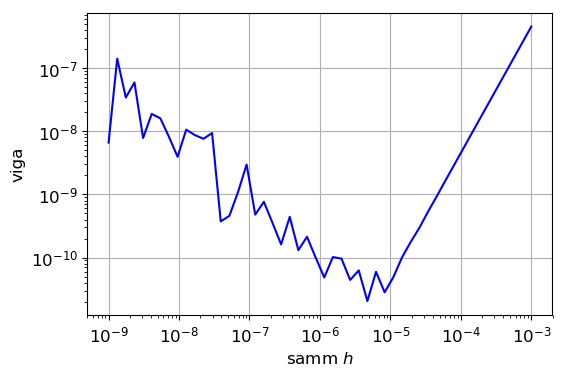

In [4]:
f = exp  # funktsioon
x = 1.0
t = exp(x)  # tuletis

H = geomspace(1e-9, 1e-3, 50)
T = (f(x+H) - f(x-H)) / (2*H)
V = abs(T-t)  # viga

figure(figsize=(6,4))
plot(H, V, 'b-')
xscale('log')
yscale('log')
xlabel('samm $h$')
ylabel('viga')
grid()
show()

Põhimõtteliselt saaks optimaalse sammu (mille juures asub graafiku miinimum) välja arvutada. Selleks peab teadma nii diferentsvalemi viga kui ka ümardusviga.

Tsentreeritud diferentsvalemi suvalist järku tuletise leidmiseks realiseerib funktsioon `scipy.misc.derivative`. Lisaks diferentseeritavale funktsioonile ja $x$-väärtusele saab vajadusel määrata, mitmendat järku tuletis (nimeline parameeter `n`, vaikimisi 1) ning kui suure sammu (`dx`) ja mitme punkti (`order`) baasil arvutada. Vaikimisi on samm 1, mis on üldjuhul küllaltki meelevaldne ehk mitteoptimaalne.

In [5]:
from scipy.misc import derivative

print(derivative(exp, 1.0))
print(derivative(exp, 1.0, dx=1e-2))  # peenem samm
print(derivative(exp, 1.0, dx=1e-2, order=5))  # kõrgemat järku valem täpsem
print(derivative(exp, 1.0, n=2, dx=1e-4))  # teist järku tuletis
print(exp(1))  # tegelik

3.19452804947
2.71832713338
2.71828182755
2.71828186627
2.71828182846


## Numbriline integreerimine

Numbrilise integreerimise valemeid nimetatakse kvadratuurvalemiteks. Oletagem esialgu jällegi, et funktsiooni $f(x)$ väärtused on tabuleeritud kindla sammu tagant, näiteks punktides $x_i=a+ih$, kus $i=0,1,\ldots,n$. Integraali $\int_a^b f(x)\,dx$ arvutamine taandub sel juhul küsimusele, kuidas otstarbekalt [interpoleerida](interp.html) nii, et sellest tulenev algoritm integraali arvutamiseks oleks võimalikult lihtne ja samas ka võimalikult täpne.

Määratud integraal defineeritakse teatavasti kui integraalsumma piirväärtus. *Newton-Cotesi meetodi* aluseks ongi avaldis $$\int_a^b f(x)\,dx\approx\sum_i w_i\cdot f(x_i)=\sum_i w_i\cdot f_i,$$ mis taandab probleemi optimaalsete kaalude $w_i$ leidmisele. Põhimõtteliselt võiks kasutada Lagrange'i interpolatsioonipolünoomi, aga Runge fenomeni tõttu võib see hakata tugevalt ostsilleerima, sest kõigil praktilistel juhtudel on $n$ väga suur. Selle tõttu rakendatakse kvadratuurvalemeid eraldi lühikestel lõikudel, mis sisaldavad tüüpiliselt vaid 2&ndash;4 punkti (sh otspunktid). Lihtsaim lahendus on ühendada punktid sirgega ja arvutada selle sirge aluse trapetsi pindala. Esmalt kahe punkti korral: $$\int_a^b f(x)\,dx=\frac{h}{2}(f_0+f_1)-\frac{h^3}{12}f^{(2)}(\xi),$$ kus vealiikmes $\xi$ asub kusagil $a$ ja $b$ vahel. Seda nimetatakse *trapetsvalemiks*.

Kui võtame korraga kolm punkti, saame neist läbi ajada juba parabooli, ja vastav kvadratuurvalem tuleb selline: $$\int_a^b f(x)\,dx=\frac{h}{3}(f_0+4f_1+f_2)-\frac{h^5}{90}f^{(4)}(\xi).$$ Seda nimetataks *Simpsoni valemiks*. Vealiiget vaadates on selge, et selle täpsus on oluliselt parem kui trapetsvalemil. Samas tuleb jälle rõhutada, et see täpsus omab mõtet vaid piisavalt täpsete andmepunktide korral, vastasel juhul on polünoomiga interpoleerimine mõttetu.

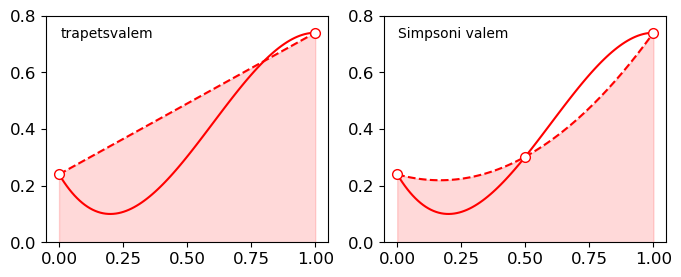

In [6]:
from scipy.interpolate import barycentric_interpolate

f = lambda x: 0.1 + 3*(x - 0.2)**2 - 2.5*(x - 0.2)**3

def graafik(n, nimi):
    a, b = 0, 1
    X = linspace(a, b, 100)
    plot(X, f(X), 'r-')
    X1 = linspace(a, b, n)
    Y1 = f(X1)
    P = polyfit(X1, Y1, n-1)
    Y2 = polyval(P, X)
    plot(X, Y2, 'r--')
    fill_between(X, Y2, 0, where=np.logical_and(X <= b, X >= a), color='red', alpha=0.15)
    plot(X1, Y1, 'ro', markerfacecolor='white', markersize=7)
    ylim(0, 0.8)
    axtext(0.05, 0.95, nimi, ha='left', va='top')

figure(figsize=(8,3))
subplot(121)
graafik(2, 'trapetsvalem')
subplot(122)
graafik(3, 'Simpsoni valem')
show()

Nendel graafikutel pidevjoon kirjeldab funktsiooni $f(x)$, ringiga tähistatud punktid märgivad funktsiooni teadaolevaid väärtuseid ja kriipsjooned kujutavad interpolatsioonipolünoomi läbi nende punktide.

Rakendades trapetsvalemit eraldi igas vahemikus, saame kõige üldisemal kujul (mis kehtib isegi ebaühtlase sammu korral): $$\int_a^b f(x)\,dx\approx \sum_{i=0}^{n-1} \frac{x_{i+1}-x_i}{2}(f_i+f_{i+1}).$$ Konstantse sammu korral $$\int_a^b f(x)\,dx\approx \frac{h}{2}\left(f_0+2f_1+2f_2+ \cdots + 2f_{n-1}+ f_n\right).$$

Kui tahame konstrueerida komposiitvalemi Simpsoni valemi baasil, peab vahemike arv olema ilmselt paaris ehk andmepunktide arv paaritu. Tulemus on selline: $$\int_a^b f(x)\,dx\approx \frac{h}{3}\left(f_0+ 4f_1 + 2f_2 + 4f_3 + \cdots + 4f_{n-1} + f_n\right).$$

NumPy massiividega on lihtne realiseerida üldine trapetsvalem vektoriseeritud kujul. Kasulikuks osutub funktsioon `numpy.diff`, mis rakendatuna massiivile `X` tagastab massiivina kõik vahemikud `X[i+1]-X[i]`. Kahe sama pikkusega massiivi elementide korrutiste summa annab `numpy.dot` (või massiivi samanimeline meetod).

Integraal trapetsvalemiga: 0.950020270407


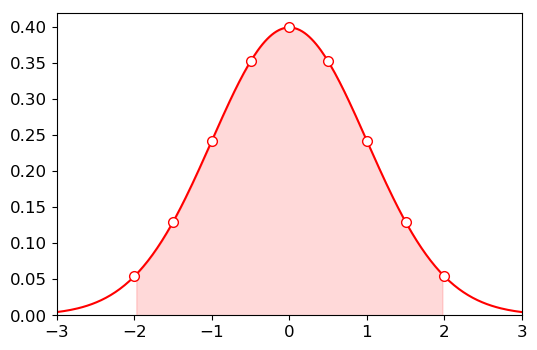

In [7]:
# tegelik sõltuvus
gauss = lambda x: 1 / sqrt(2 * pi) * exp(-x**2/2)

# andmepunktid
X = linspace(-2, 2, 9)
Y = gauss(X)

# trapetsvalem
pindala = np.diff(X).dot(Y[:-1] + Y[1:]) / 2
print('Integraal trapetsvalemiga:', pindala)

X1 = linspace(-3, 3, 200)
Y1 = gauss(X1)
plot(X1, Y1, 'r-')
xlim(-3, 3)
ylim(ymin=0)
fill_between(X1, Y1, 0, where=abs(X1)<=2, color='r', alpha=0.15)
plot(X, Y, 'ro', markerfacecolor='white', markersize=7)
show()

Samas on nii trapetsvalem kui ka Simpsoni valem realiseeritud moodulis `scipy.integrate`. Funktsioon `trapz` annab tõepoolest sama tulemuse. Nende funktsioonide kasutamisel ainsaks nõutud argumendiks on funktsiooni väärtuste vektor `Y`, mis antakse esimese parameetrina. Argumendi vektorit `X` ei pea üldse andma, vähemalt juhul kui funktsiooni lugemite samm on konstant. Viimase saab anda ka nimelise parameetrina `dx`, kuigi selle efekt on lihtsalt tulemuse läbikorrutamine `dx`-ga.

Järgnevas on võrdlusena toodud ka integraali tegelik väärtus. Integreeritavaks funktsiooniks on Gaussi kelluke, mis esindab normaaljaotuse tõenäosustihedust. Teatavasti selle funktsiooni integraal tõepoolest ei avaldu analüütiliselt, nii et numbriline arvutamine on selles mõttes õigustatud. Samas on see piisavalt oluline sõltuvus, mille jaoks on defineeritud spetsiaalne [erifunktsioon](https://en.wikipedia.org/wiki/Special_functions), mida nimetatakse ootuspäraselt [veafunktsiooniks](https://en.wikipedia.org/wiki/Error_function). [Suur hulk](https://docs.scipy.org/doc/scipy/reference/special.html) selliseid (vektoriseeritud) erifunktsioone on realiseeritud moodulis `scipy.special`.

In [12]:
from scipy.integrate import trapz, simps, quad, fixed_quad
from scipy.special import erf

print('Trapetsvalem:    %.16f' % trapz(Y, X))
print('Simpsoni valem:  %.16f' % simps(Y, X))
print('Gaussi valem:    %.16f' % fixed_quad(gauss, -2, 2, n=9)[0])
print('Clenshaw-Curtis: %.16f' % quad(gauss, -2, 2, epsabs=1e-14, epsrel=1e-14)[0])
print('Tegelik:         %.16f' % erf(sqrt(2)))

Trapetsvalem:    0.9500202704066451
Simpsoni valem:  0.9544021285578907
Gaussi valem:    0.9544997413206670
Clenshaw-Curtis: 0.9544997361036416
Tegelik:         0.9544997361036416


Antud näites funktsioon $f(x)$, mida integreeritakse, on tegelikult teada. Seega on vabadus valida, millistes punktides funktsiooni väärtuseid kasutada, et integraal saaks arvutatud vajaliku täpsusega ja minimaalse arvutusressursiga. Põhimõte on endiselt selles, et funktsioon avaldatakse teatud lihtsate baasfunktsioonide kaudu (näiteks trigonomeetrilised funktsioonid, Tšebõšovi polünoomid, Legendre polünoomid, vms). Tuntud on [Gaussi](https://en.wikipedia.org/wiki/Gaussian_quadrature) ja [Clenshaw-Curtise](https://en.wikipedia.org/wiki/Clenshaw%E2%80%93Curtis_quadrature) kvadratuurvalemid. Nende meetodite sõnastamiseks muudetakse harilikult integreeritava funktsiooni mastaapi nii, et integreerimisvahemik oleks $[-1, 1]$. Selle saavutamine on lihtne: $$\int_a^b f(x)\,dx=\frac{b-a}{2}\int_{-1}^1 f\left(\frac{b-a}{2}x+\frac{b+a}{2}\right)\,dx.$$

Clenshaw-Curtis'e meetodi realiseerib funktsioon `scipy.integrate.quad`. Parameetritega `epsabs` ja `epsrel` saab kontrollida nõutavat täpsust. Funktsioon tagastab ennikuna nii integraali väärtuse kui ka selle veahinnangu. Viimases näites oli võrdlusena toodud ka selle meetodiga saadud tulemus (aga selle täpsus sõltub muidugi `epsabs` ja `epsrel` valikust).

Järgnev näide demonstreerib kahepunktilist Gauss–Legendre kvadratuurvalemit. Selle arvutamine on sama lihtne nagu trapetsvalemi korral, aga kuni 3. järku polünoomi korral on saadud integraali väärtus täpne. Kõik Gaussi kvadratuurvalemid ongi sellised, et $n$ punkti baasil arvutatuna annavad need täpse tulemuse kuni $2n-1$ järku polünoomi korral.

Trapetsvalem:   6.0
Gauss-Legendre: 16.6666666667
Tegelik:        16.666666666666668


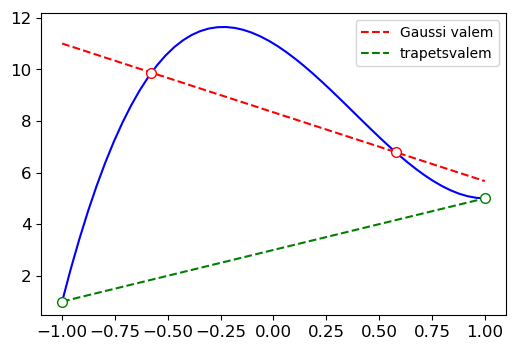

In [13]:
f = lambda x: 7*x**3 - 8*x**2 - 5*x + 11
F = lambda x: (7/4)*x**4 - (8/3)*x**3 - (5/2)*x**2 + 11*x

Xt = np.array( (-1., 1.) )
Yt = f(Xt)

Xg = np.array( (-1/sqrt(3), 1/sqrt(3)) )
Yg = f(Xg)

print('Trapetsvalem:  ', Yt.sum())
print('Gauss-Legendre:', Yg.sum())
print('Tegelik:       ', F(1) - F(-1))

Xf = linspace(-1, 1, 50)
plot(Xf, f(Xf), 'b-')
P = polyfit(Xg, Yg, 1)
plot(Xf, polyval(P,Xf), 'r--', label='Gaussi valem')
plot(Xg, Yg, 'ro', markerfacecolor='white', markersize=7)
P = polyfit(Xt, Yt, 1)
plot(Xf, polyval(P,Xf), 'g--', label='trapetsvalem')
plot(Xt, Yt, 'go', markerfacecolor='white', markersize=7)
legend()
show()

## Monte Carlo meetod

Kordses integraalis $$I=\int_\Omega f(x_1, x_2, \ldots, x_m)\,dx_1dx_2\ldots dx_m=\int_\Omega f(\vec x)\,d\vec x$$ $f(\vec x)$ tähistab mitmemuutuja funktsiooni (argumendid on kokku võetud vektorisse $\vec x$) ja $\Omega$ tähistab integreerimispiirkonda. Kui ühemõõtmelise integraali numbriline arvutamine mõne traditsioonilise võttega nõuab näiteks 100 arvutustehet, siis $m$-kordse integraali leidmine sama meetodiga nõuab ilmselt juba $100^m$ tehet.

*Monte Carlo meetodi* korral arvutatakse $f(\vec x)$ mitte regulaarse võrgustiku sõlmedes, vaid juhuslikult valitud punktides. Lihtsamal juhul genereeritakse $n$ ühtlase jaotusega juhuslikku punkti $\vec x_1,\ldots, \vec x_n\in\Omega$, nii et integraali ligikaudne väärtus avaldub  piirkonna $\Omega$ ruumala $V$ ja funktsiooni $f(\vec x)$ aritmeetilise keskmise korruisena: $$I\approx I_n=V\frac{1}{n}\sum f(\vec x_i),\quad V=\int_\Omega \,d\vec x.$$

Kuna punktid $\vec x_i$ on juhuslikud, siis ka kõik $f(\vec x_i)$ on sõltumatud juhuslikud suurused, nii et saame kasutada dispersiooni tuntud omadust: $$\dispers(I_n)=\frac{V^2}{n^2}\sum \dispers[f(\vec x_i)]=\frac{V^2}{n}\dispers(f),$$ sest kõik $\dispers[f(\vec x_i)]$ on ühesugused. Seega $I$ arvutamise statistiline viga kahaneb pöördvõrdeliselt $\sqrt n$-ga, ja seda sõltumata integraali kordsusest.

Monte Carlo meetodi õpikunäide on ringi pindala (ehk ühtlasi arvu $\pi$ väärtuse) leidmine: $$I=\int_{-1}^1\int_{-1}^1 f(x,y)\,dxdy,$$ kus $$f(x,y)=\begin{cases}1,\quad\text{kui }x^2+y^2\leq 1\\0,\quad\text{kui }x^2+y^2>1\end{cases}$$ Seega $\Omega$ on antud näites kahemõõtmeline ruudukujuline piirkond, kus ühtlase jaotusega arvude genereerimine on lihtne.

3.1328


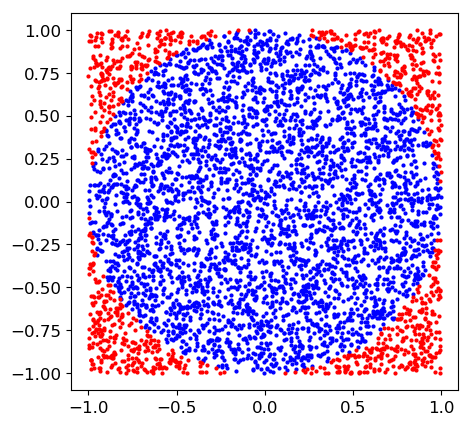

In [14]:
n = 5000
X = 2 * rand(n) - 1
Y = 2 * rand(n) - 1
R = X**2 + Y**2
I = 4 * (R<1).sum() / n
print(I)

figure(figsize=(5,5))
plot(X[R<1], Y[R<1], 'b.')
plot(X[R>1], Y[R>1], 'r.')
show()